## Business Problem Understanding

Dream housin Finance company deals in all Kinds of home loans.They have presencce across all urban semi urban and rural areas Cutomer
first applies for home loan and afetr that company validates the customer eligibility for loan.

Company wants to artibute the loan eligibility process (real time) based on consumer details provides whill filling omnline application form. these detials are gender ,Martal Statas,Education,No of Dependent,income loan ammount,Creadit history and others to automate this process,they have provides a dataset to identify the custemers segments that are eligiable for loan ammount so that they can specifically tatrget these customers.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Data Understanding
  - Loan_ID:Unique Loan ID
  - Gender:Male/Female
  - Married:Applicant Married
  - Dependents:Number of dependents
  - Education:Applicant Education
  - Self Employed:whether the applicant is Self employed
  - Applicant Income:Coapplicant income
  - Loan_Amount_Team:Term of loan in months
  - Credit_History:cedit history meets guidelines
  - Property_Area:Urban/Semi Urabn/Rural
  - LOan_Status:Loan approved traget variable


In [5]:
data["Loan_ID"].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [6]:
data.drop(columns=["Loan_ID"],inplace=True)

In [7]:
data["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
data["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [9]:
data["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [10]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
data["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [16]:
data["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
data_cleaned = data.dropna(subset=['Self_Employed'])

In [18]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [19]:
data['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [20]:
data['ApplicantIncome'].value_counts()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

In [21]:
data['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [22]:
data["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [23]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [24]:
data["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [25]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [26]:
data["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [27]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [28]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [29]:
continous=['ApplicantIncome','CoapplicantIncome','LoanAmount']
dicrete_categorical=['Gender','Married','Education','Self_Employed',
                    'Credit_History','Property_Area','Loan_Status']
discrete_count=['Dependents','Loan_Amount_Term']

## Exploratory Data Analysis(EDA)
 - For continous Variables

In [30]:
data[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


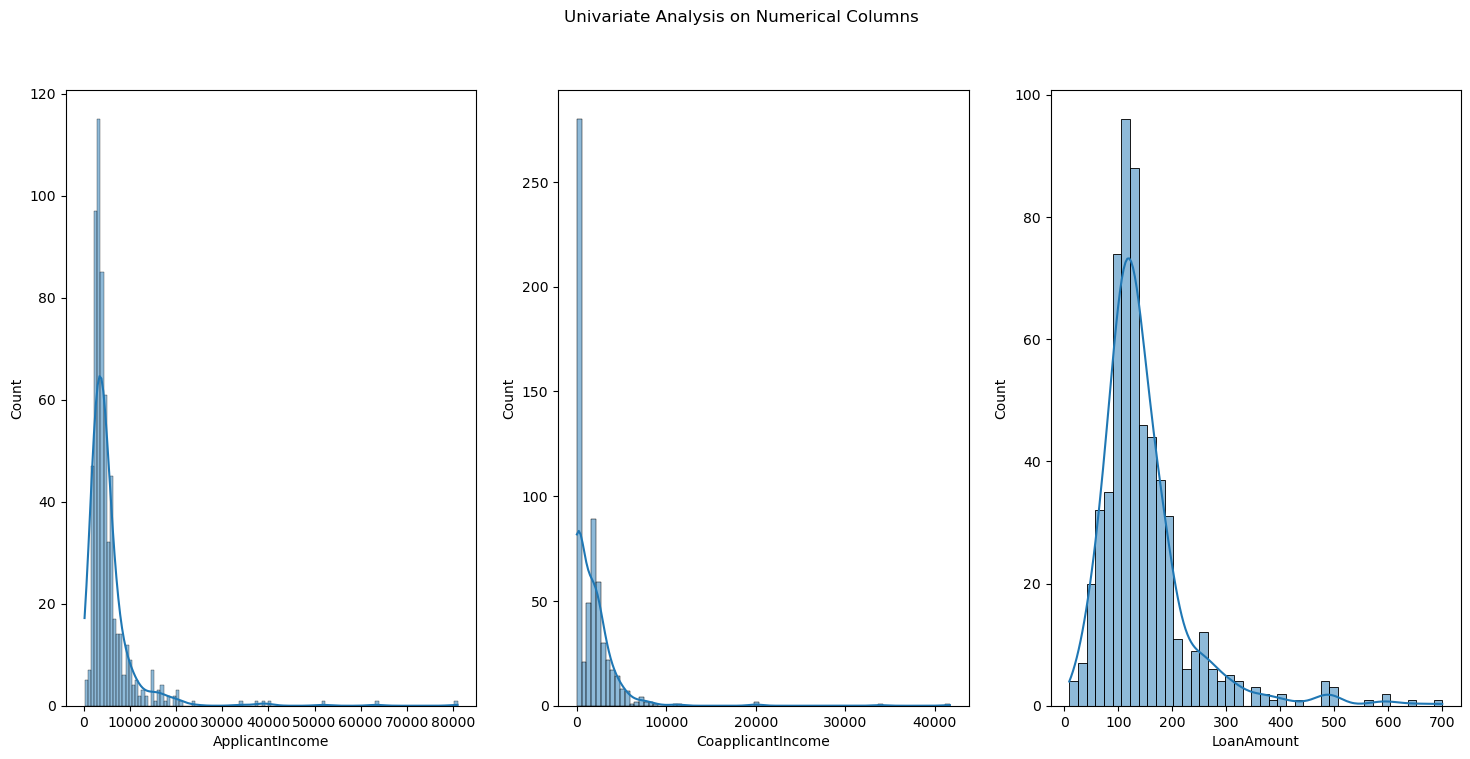

In [31]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,3, 1)
sns.histplot(data['ApplicantIncome'],kde=True)


plt.subplot(1,3,2)
sns.histplot(data['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [32]:
data[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

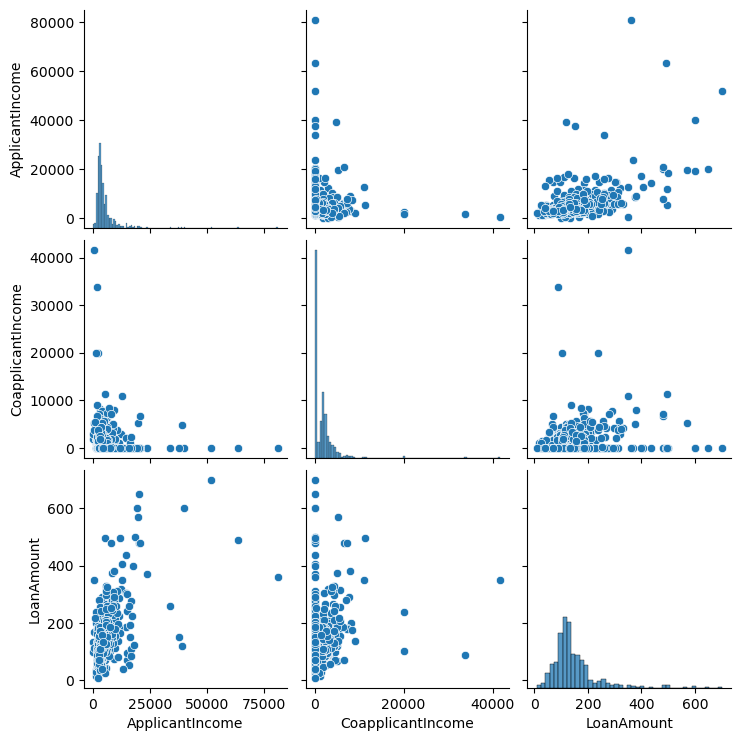

In [33]:
sns.pairplot(data[continous])
plt.show()

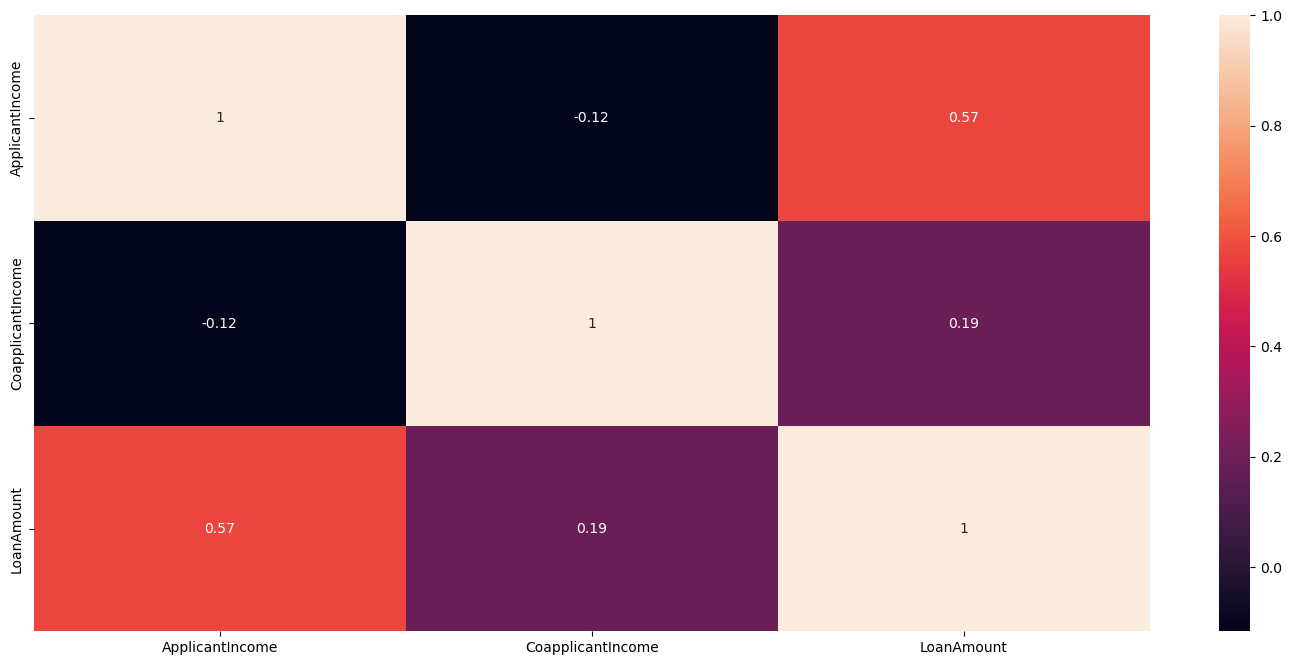

In [34]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

In [35]:
## Lets Visulize the outlier using Box plot

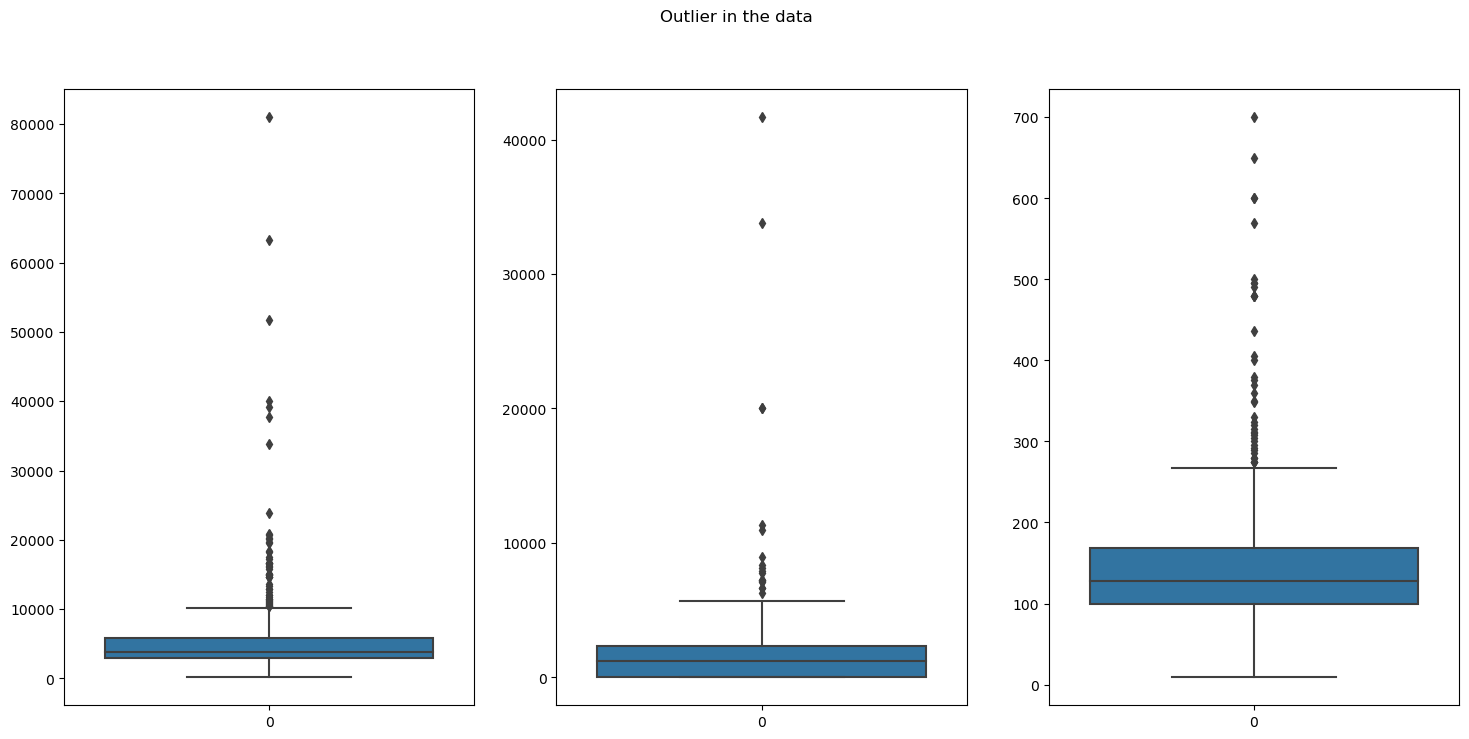

In [36]:
plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])


plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])
            
plt.suptitle("Outlier in the data ")
plt.show()            

In [37]:
data[dicrete_categorical].describe()

,Credit_History
count,564.000000
mean,0.842199
std,0.364878
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


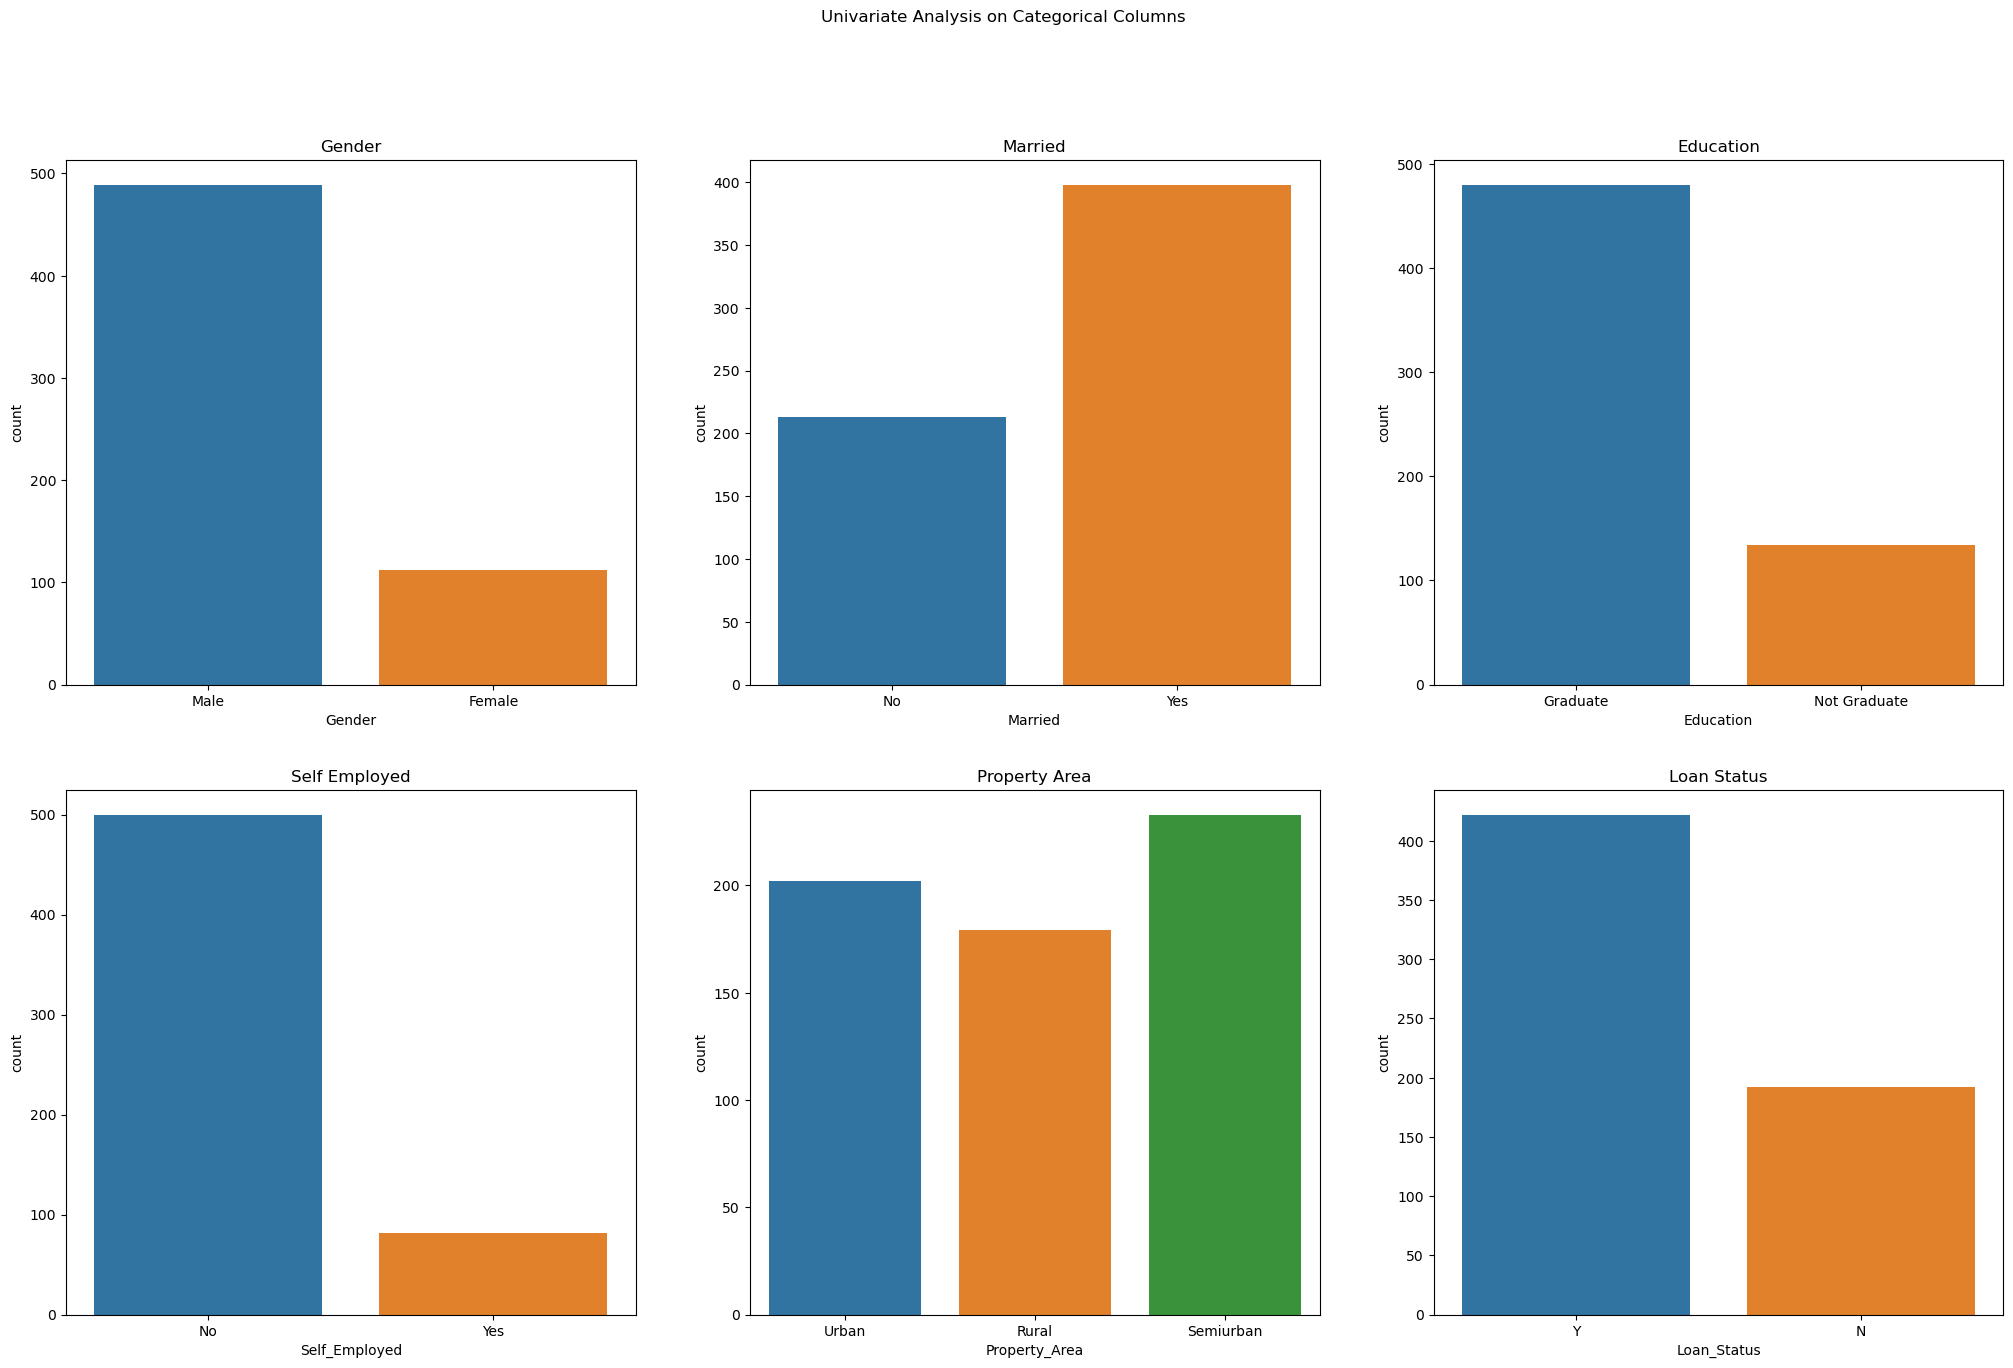

In [38]:
# Set the figure size
plt.rcParams['figure.figsize'] = (25, 15)

# Assuming `data` is your DataFrame containing the categorical columns

# Create subplots
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=data)
plt.title('Gender')

plt.subplot(2, 3, 2)
sns.countplot(x='Married', data=data)
plt.title('Married')

plt.subplot(2, 3, 3)
sns.countplot(x='Education', data=data)
plt.title('Education')

plt.subplot(2, 3, 4)
sns.countplot(x='Self_Employed', data=data)
plt.title('Self Employed')

plt.subplot(2, 3, 5)  # Adjusted the subplot index from 6 to 5
sns.countplot(x='Property_Area', data=data)
plt.title('Property Area')

plt.subplot(2, 3, 6)  # Adjusted the subplot index from 7 to 6
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status')

# Add a super title for the entire figure
plt.suptitle("Univariate Analysis on Categorical Columns")
plt.show()


## Data Preparation

In [39]:
data["Income"] = data["ApplicantIncome"]+data["CoapplicantIncome"]
data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

## Modifying the wrong data

In [40]:
data['Dependents'] = data['Dependents'].replace({'3+':3})

## Missing Values Treatment

In [41]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [42]:
data.isnull().sum()/len(data)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [43]:
## count variable replace with 0
data=data.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

In [44]:
## count variables replace with zero
data['Dependents'] = data['Dependents'].fillna(0)

In [45]:
## categorical variable replace with mode
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


In [46]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [47]:
data.head(200)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
230,Male,Yes,1,Graduate,No,104.0,360.0,1.0,Semiurban,Y,4545.0
231,Male,Yes,0,Graduate,No,42.0,180.0,1.0,Rural,Y,3716.0
233,Female,No,0,Graduate,No,280.0,360.0,1.0,Semiurban,Y,8333.0
234,Male,Yes,1,Graduate,No,140.0,360.0,1.0,Semiurban,Y,4934.0


In [48]:
# Remove rows with None values in specific columns, e.g., 'Gender' and 'Married'
data_cleaned = data.dropna(subset=['Gender', 'Married','Self_Employed','Dependents','Credit_History'])


## Encoding

In [49]:
data["Gender"]=data["Gender"].map({"Male":1,'Female':0})
data["Education"]=data["Education"].map({'Graduate':1,'Not Graduate':0})
data['Married']=data['Married'].map({'Yes':1,'No':0})
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})
data['Property_Area']=data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})

In [50]:
data['Dependents']=data['Dependents'].astype('int')
data['Loan_Amount_Term']=data["Loan_Amount_Term"].astype('int')

In [51]:
data['Loan_Amount_Term']=data['Loan_Amount_Term']/12

In [52]:
data['Income'].skew()

5.777628425613762

In [53]:
data['LoanAmount'].skew()

2.6079450669733437

In [54]:
from scipy.stats import boxcox
data['Income'],a=boxcox(data['Income'])
data['LoanAmount'],c=boxcox(data['LoanAmount'])                           
                           

In [55]:
data[['LoanAmount','Income']].skew()

LoanAmount    0.038289
Income       -0.027769
dtype: float64

In [56]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize lists to store metrics for different random states
Train = []
Test = []
CV = []

# Loop over random states from 1 to 100
for i in range(1, 101):
    # Split the data with the current random state
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    
    # Initialize and train the logistic regression model
    log_default = LogisticRegression()
    log_default.fit(x_train, y_train)
    
    # Make predictions
    ypred_train = log_default.predict(x_train)
    ypred_test = log_default.predict(x_test)
    
    # Calculate accuracy scores
    Train.append(accuracy_score(y_train, ypred_train))
    Test.append(accuracy_score(y_test, ypred_test))
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(log_default, x_train, y_train, cv=5, scoring='accuracy')
    CV.append(cv_scores.mean())

# Create a DataFrame to store all the metrics
em = pd.DataFrame({"Train": Train, "Test": Test, "CV": CV})

# Filter the DataFrame based on the specified criteria
gm = em[(abs(em['Train'] - em['Test']) <= 0.05) & (abs(em['Test'] - em['CV']) <= 0.05)]

# Find the index of the best random state
if not gm.empty:
    rs = gm[gm["CV"] == gm["CV"].max()].index.to_list()[0] + 1
    print("Best random_state number:", rs)
else:
    print("No suitable random state found.")


Best random_state number: 70


#### Train test split

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=70)

## Machine learining Modeling & Evalution

### Logistic Regression

In [59]:
from sklearn.linear_model import  LogisticRegression
log_model=  LogisticRegression()
log_model.fit(x_train,y_train)


yprad_train=log_model.predict(x_train)
ypred_test=log_model.predict(x_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(log_model,x_train,y_train,
                                               cv=5,scoring='accuracy'))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy : 0.6501182033096927
Cross Validation Score: [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]
Test Accuracy: 0.7830188679245284


In [60]:
from sklearn.neighbors import KNeighborsClassifier
estimator =  KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50))}

In [61]:
from sklearn.model_selection import  GridSearchCV
knn_grid =  GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(x_train,y_train)

knn_model =knn_grid.best_estimator_

ypred_train = knn_model.predict(x_train)
ypred_test = knn_model.predict(x_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("cross validation score :",cross_val_score(knn_model,x_train,y_train,cv=5,
                                                scoring='accuracy'))
print('Test Accuracy :',accuracy_score(y_test,ypred_test))

Train Accuracy : 0.7541371158392435
cross validation score : [0.72941176 0.74117647 0.74117647 0.73809524 0.73809524]
Test Accuracy : 0.7075471698113207


## Support vactor machine(SVM)

In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Define the estimator
estimator = SVC()

# Define the parameter grid with correct parameter names
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}

# Initialize the GridSearchCV object
svm_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the training data
svm_grid.fit(x_train, y_train)

# Get the best estimator found by GridSearchCV
svm_model = svm_grid.best_estimator_

# Make predictions on the training and test sets
ypred_train = svm_model.predict(x_train)
ypred_test = svm_model.predict(x_test)

# Calculate and print accuracy scores
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Cross Validation Score:", cross_val_score(svm_model, x_train, y_train, cv=5, scoring='accuracy').mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.8226950354609929
Cross Validation Score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


### Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
estmator = DecisionTreeClassifier(random_state=rs)
param_grid = {"criterion":["gini","entropy"],"max_depth":list(range(1,16))} 


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

estimator = DecisionTreeClassifier()

# Initialize the GridSearchCV object
dt_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the training data
dt_grid.fit(x_train, y_train)

# Get the best estimator found by GridSearchCV
dt = dt_grid.best_estimator_

# Get feature importances from the best estimator
dt_fi = dt.feature_importances_

# Get indices of features with importance greater than 0
index = [i for i, x in enumerate(dt_fi) if x > 0]

# Select these important features from the training and test sets
x_train_dt = x_train.iloc[:, index]
x_test_dt = x_test.iloc[:, index]

# Fit the best model on the reduced feature set
dt.fit(x_train_dt, y_train)

# Make predictions on the training and test sets
ypred_train = dt.predict(x_train_dt)
ypred_test = dt.predict(x_test_dt)

# Calculate and print accuracy scores
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Cross Validation Score:", cross_val_score(dt, x_train_dt, y_train, cv=5, scoring='accuracy').mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.8226950354609929
Cross Validation Score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


In [64]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [65]:
x_train_dt

,Credit_History
158,1.0
119,1.0
448,0.0
519,1.0
391,1.0
...,...
70,1.0
370,1.0
140,1.0
252,1.0


### Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score


# Initialize the RandomForestClassifier with a random state
estimator = RandomForestClassifier(random_state=rs)

# Define the parameter grid
param_grid = {"n_estimators": list(range(1, 51))}

# Initialize the GridSearchCV object
rf_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the training data
rf_grid.fit(x_train, y_train)

# Get the best estimator found by GridSearchCV
rf = rf_grid.best_estimator_

# Get feature importances from the best estimator
rf_fi = rf.feature_importances_

# Get indices of features with importance greater than 0
index = [i for i, x in enumerate(rf_fi) if x > 0]

# Select these important features from the training and test sets
x_train_rf = x_train.iloc[:, index]
x_test_rf = x_test.iloc[:, index]

# Fit the best model on the reduced feature set
rf.fit(x_train_rf, y_train)

# Make predictions on the training and test sets
ypred_train = rf.predict(x_train_rf)
ypred_test = rf.predict(x_test_rf)

# Calculate and print accuracy scores
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Cross Validation Score:", cross_val_score(rf, x_train_rf, y_train, cv=5, scoring='accuracy').mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.9905437352245863
Cross Validation Score: 0.8063025210084034
Test Accuracy: 0.7641509433962265


## Ada Boost classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Assuming rs, x_train, y_train, x_test, y_test are already defined somewhere in your code
estimator = AdaBoostClassifier(random_state=rs)
param_grid = {'n_estimators': list(range(1, 51))}  # Fixed typo: 'n_estimators'

# Perform GridSearchCV
ab_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
ab_grid.fit(x_train, y_train)

# Get the best estimator and feature importances
ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_  # Fixed typo: 'feature_importances_'

# Select important features
index = [i for i, x in enumerate(ab_fi) if x > 0]

# Subset the training and test data with important features
x_train_ab = x_train.iloc[:, index]
x_test_ab = x_test.iloc[:, index]

# Fit the model with the important features
ab.fit(x_train_ab, y_train)  # Fixed typo: 'y_train'

# Make predictions
ypred_train = ab.predict(x_train_ab)
ypred_test = ab.predict(x_test_ab)

# Print accuracy scores
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Cross Validation Score:", cross_val_score(ab, x_train_ab, y_train, cv=5, scoring='accuracy').mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test))


Train Accuracy: 0.83451536643026
Cross Validation Score: 0.8298879551820729
Test Accuracy: 0.7641509433962265


## Gradient Booster Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Setting random state
rs = 42

# Define the Gradient Boosting Classifier
estimator = GradientBoostingClassifier(random_state=rs)

# Define the parameter grid
param_grid = {"n_estimators": list(range(1, 10)), "learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5]}

# Perform Grid Search with Cross-Validation
gb_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
gb_grid.fit(x_train, y_train)

# Get the best estimator
gb = gb_grid.best_estimator_

# Get feature importances
gb_fi = gb.feature_importances_

# Get indices of important features
index = [i for i, x in enumerate(gb_fi) if x > 0]

# Filter the training and test data to include only the important features
x_train_gb = x_train.iloc[:, index]
x_test_gb = x_test.iloc[:, index]

# Fit the model on the filtered training data
gb.fit(x_train_gb, y_train)

# Make predictions
ypred_train = gb.predict(x_train_gb)
ypred_test = gb.predict(x_test_gb)

# Calculate and print accuracies
print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Cross Validation Score:", cross_val_score(gb, x_train_gb, y_train, cv=5, scoring='accuracy'))
print("Test Accuracy :", accuracy_score(y_test, ypred_test))


Train Accuracy : 0.8392434988179669
Cross Validation Score: [0.82352941 0.78823529 0.82352941 0.83333333 0.83333333]
Test Accuracy : 0.7735849056603774
